 # Naive Bayes Use case

The aim of this case study is to predict the loan approval or denial status of an applicant using Naive Bayes classifier. First we load the dataset and the libraries into the code. Then we do data analyses like getting a peek at the data, dropping off relatively less important features and describing the data, finding correlation coefficients and drawing inferences for different features. Then we do data visualizations for univariate features using histogram and distibuted plot. We then split the data into training and testing data. Then a model is instantiated using Gaussian Naive Bayes method and model is fitted and acuuary is found out. Our model gives an accuarcy of 86 %. We also find the confusion matrix at the end.

In [705]:
# Load the dataset and libraries

In [706]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_auc_score
from sklearn import metrics
from patsy import dmatrices
import seaborn as sns

In [707]:
df = pd.read_excel("Naive_Bayes.xlsx")

In [708]:
df.shape

(7759, 29)

(array([4437.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3322.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

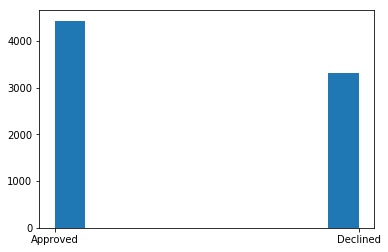

In [709]:
plt.hist(df['APPLICATION.STATUS'])

In [710]:
# Data Analysis

In [711]:
df['PRIMARY.ASSET.CTG'].unique().shape # reduce complexity

(55,)

In [712]:
# drop values

In [713]:
df1 = df.drop(['APPLICATION.ID','DSA.ID','DEALER.ID','CITY','STATE','ZIP.CODE','PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','PRIMARY.ASSET.MODELNO','QUEUE.ID','CURRENT.STAGE','QUEUE.ID','VOTER_ID','AADHAAR','DRIVING_LICENSE','BANK_PASSBOOK','PAN.STATUS','PAN'],axis =1)

In [714]:
# dataset shape

In [715]:
df1.shape

(7759, 12)

In [716]:
# peek at data

In [717]:
df1.head(5)

,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR,OWN.HOUSE.TYPE,APPLICATION.STATUS
0,Single,Male,30,GRADUATE,OWNED-BUNGLOW,SELF-EMPLOYED,69.0,32321,28000,10,Self Owned,Declined
1,Married,Male,38,OTHERS,PARENT OWNED-HOUSE,SELF-EMPLOYED,108.0,47000,47000,12,Parent Owned,Approved
2,Married,Male,52,GRADUATE,OWNED-ROWHOUSE,SELF-EMPLOYED,143.0,30000,30000,12,Self Owned,Approved
3,Married,Male,57,GRADUATE,OWNED-BUNGLOW,SELF-EMPLOYED,60.0,32321,49000,12,Self Owned,Declined
4,Married,Male,38,GRADUATE,OWNED-BUNGLOW,SALARIED,62.0,32321,45000,10,Self Owned,Approved


In [720]:
pd.pivot_table(df1,columns = 'APPLICATION.STATUS')

APPLICATION.STATUS,Approved,Declined
AGE,35.743971,35.625527
APPLICATION.SCORE,51.408835,39.577339
APPLIED.AMOUNT,33653.387199,34957.235099
APPROVED.AMOUNT,32323.229660,32319.000602
LOAN.TENOR,13.228984,12.996990


In [690]:
df2 = pd.get_dummies(data = df1)

In [692]:
df2

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR,MARITAL.STATUS_Married,MARITAL.STATUS_Single,GENDER_Female,GENDER_Male,EDUCATION_DOCTORATE,...,EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY,EMPLOY.CONSTITUTION_SALARIED,EMPLOY.CONSTITUTION_SELF-EMPLOYED,EMPLOY.CONSTITUTION_TRUST,OWN.HOUSE.TYPE_Children Owned,OWN.HOUSE.TYPE_Parent Owned,OWN.HOUSE.TYPE_Self Owned,OWN.HOUSE.TYPE_Spouse Owned,APPLICATION.STATUS_Approved,APPLICATION.STATUS_Declined
0,30,69.0,32321,28000,10,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,38,108.0,47000,47000,12,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,52,143.0,30000,30000,12,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,57,60.0,32321,49000,12,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,38,62.0,32321,45000,10,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5,43,92.0,32321,30000,12,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
6,28,3.0,32321,49000,12,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
7,33,13.0,32321,17900,10,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
8,30,74.0,32321,13000,12,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
9,23,13.0,32321,77000,18,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [693]:
# descriptions

In [694]:
df1.describe()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
count,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000
mean,35.693259,46.343204,32321.418997,34211.627014,13.129656
std,9.391776,34.835119,9988.441681,18952.163116,12.682123
min,12.000000,-45.000000,7001.000000,10.000000,0.000000
25%,28.000000,13.000000,32000.000000,21000.000000,10.000000
50%,34.000000,42.000000,32321.000000,30000.000000,12.000000
75%,42.000000,73.000000,32321.000000,43870.000000,12.000000
max,67.000000,160.000000,300000.000000,800000.000000,360.000000


In [695]:
# correlation

In [696]:
df2.corr(method = 'pearson')

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR,MARITAL.STATUS_Married,MARITAL.STATUS_Single,GENDER_Female,GENDER_Male,EDUCATION_DOCTORATE,...,EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY,EMPLOY.CONSTITUTION_SALARIED,EMPLOY.CONSTITUTION_SELF-EMPLOYED,EMPLOY.CONSTITUTION_TRUST,OWN.HOUSE.TYPE_Children Owned,OWN.HOUSE.TYPE_Parent Owned,OWN.HOUSE.TYPE_Self Owned,OWN.HOUSE.TYPE_Spouse Owned,APPLICATION.STATUS_Approved,APPLICATION.STATUS_Declined
AGE,1.000000,0.167945,0.057474,0.069959,0.005535,0.387161,-0.387161,0.034777,-0.034777,0.012112,...,-0.022336,-0.097232,0.102573,-0.014560,0.057037,-0.215726,0.166269,0.092104,0.006241,-0.006241
APPLICATION.SCORE,0.167945,1.000000,0.110576,0.089620,-0.018497,0.065445,-0.065445,-0.093164,0.093164,0.030684,...,0.008460,0.031707,-0.031802,-0.005719,-0.013647,-0.071452,0.076104,-0.016644,0.168070,-0.168070
APPROVED.AMOUNT,0.057474,0.110576,1.000000,0.500006,0.003750,0.013531,-0.013531,0.022598,-0.022598,0.004233,...,-0.007515,-0.022320,0.022008,0.016639,0.005758,-0.060009,0.052599,0.011453,0.000210,-0.000210
APPLIED.AMOUNT,0.069959,0.089620,0.500006,1.000000,0.027844,-0.011113,0.011113,0.009120,-0.009120,-0.001391,...,-0.024681,-0.028101,0.029240,0.002383,-0.001977,-0.046137,0.042883,0.003908,-0.034044,0.034044
LOAN.TENOR,0.005535,-0.018497,0.003750,0.027844,1.000000,-0.008752,0.008752,-0.006831,0.006831,-0.004540,...,-0.008553,-0.005242,-0.000944,-0.006401,-0.001196,0.010604,-0.019422,0.024166,0.009052,-0.009052
MARITAL.STATUS_Married,0.387161,0.065445,0.013531,-0.011113,-0.008752,1.000000,-1.000000,0.119771,-0.119771,0.010982,...,-0.024705,-0.092725,0.098696,-0.007007,0.009791,-0.142285,0.106533,0.074955,0.033570,-0.033570
MARITAL.STATUS_Single,-0.387161,-0.065445,-0.013531,0.011113,0.008752,-1.000000,1.000000,-0.119771,0.119771,-0.010982,...,0.024705,0.092725,-0.098696,0.007007,-0.009791,0.142285,-0.106533,-0.074955,-0.033570,0.033570
GENDER_Female,0.034777,-0.093164,0.022598,0.009120,-0.006831,0.119771,-0.119771,1.000000,-1.000000,0.000318,...,-0.016342,-0.037191,0.039499,-0.001691,0.038880,-0.070834,0.011976,0.135854,0.007566,-0.007566
GENDER_Male,-0.034777,0.093164,-0.022598,-0.009120,0.006831,-0.119771,0.119771,-1.000000,1.000000,-0.000318,...,0.016342,0.037191,-0.039499,0.001691,-0.038880,0.070834,-0.011976,-0.135854,-0.007566,0.007566
EDUCATION_DOCTORATE,0.012112,0.030684,0.004233,-0.001391,-0.004540,0.010982,-0.010982,0.000318,-0.000318,1.000000,...,-0.002050,0.011417,-0.010942,-0.001183,-0.001483,-0.006253,0.008808,-0.006940,0.007542,-0.007542


In [697]:
# Data Inferences

In [700]:
df1.groupby('APPLICATION.STATUS').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
APPLICATION.STATUS,,,,,
Approved,35.743971,51.408835,32323.229660,33653.387199,13.228984
Declined,35.625527,39.577339,32319.000602,34957.235099,12.996990


In [701]:
df1.groupby('MARITAL.STATUS').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
MARITAL.STATUS,,,,,
Married,37.474668,47.460112,32387.631613,34108.442225,13.075276
Single,28.272304,41.690413,32045.591877,34641.472037,13.356192


In [702]:
df1.groupby('GENDER').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
GENDER,,,,,
Female,36.431496,39.007811,32831.613386,34602.300787,12.933858
Male,35.548775,47.778857,32221.565881,34135.165973,13.167977


In [751]:
pd.pivot_table(df1,columns = 'APPLICATION.STATUS',index= 'AGE',aggfunc = 'count')

APPLICATION.SCORE          APPLIED.AMOUNT             \
APPLICATION.STATUS          Approved Declined       Approved   Declined   
AGE                                                                       
12                               NaN    13.00            NaN    40000.0   
18                               NaN    13.00            NaN    52000.0   
19                               NaN   179.00            NaN   130000.0   
20                               NaN   287.00            NaN   383500.0   
21                            1282.0   907.00      1097000.0  1506050.0   
22                            3321.0  2307.00      2396401.0  3080802.0   
23                            4042.0  2840.00      2607960.0  3728780.0   
24                            6681.0  3617.00      5288250.0  4219460.0   
25                            6931.0  3274.00      5751590.0  3769250.0   
26                            8068.0  4552.00      6422390.0  4365878.0   
27                            9110.0  4679.00      6355010.0  4777380.0   
28                            9555.0  4286.00      6330701.0  4134650.0   
29                            8636.0  4755.92      6636530.0  3787250.0   
30                           11539.0  6453.00      7075179.0  5584113.0   
31                            9180.0  6029.00      6401320.0  5305280.0   
32                            8868.0  4483.00      5994760.0  4157670.0   
33                            9795.0  4546.00      6280715.0  4235940.0   
34                           10218.0  5362.00      6200332.0  3864590.0   
35                            7951.0  5721.00      4976650.0  4571980.0   
36                            9835.0  5297.00      6103195.0  4398965.0   
37                            8432.0  3607.00      5576380.0  3505300.0   
38                            7612.0  4051.00      4755945.0  3376890.0   
39                            7264.0  4821.00      4586268.0  3126330.0   
40                            6983.0  5234.00      4226990.0  5131600.0   
41                            7430.0  3895.00      4728780.0  3249583.0   
42                            5686.0  3933.00      3135540.0  2979750.0   
43                            6855.0  4039.00      4445150.0  3447040.0   
44                            4685.0  2895.00      2963290.0  2327090.0   
45                            4954.0  3393.00      2658450.0  2670700.0   
46                            5180.0  2877.00      3205289.0  2561390.0   
47                            4054.0  2415.00      2446810.0  1693090.0   
48                            4048.0  2347.00      2678500.0  1870480.0   
49                            4723.0  2164.00      2347056.0  1721080.0   
50                            3948.0  1713.00      2222200.0  1160380.0   
51                            4301.0  2214.00      2815920.0  1393300.0   
52                            2038.0   951.00      1392887.0   789700.0   
53                            2889.0  1440.00      1730350.0  1413000.0   
54                            2183.0  1113.00      1575801.0  1065450.0   
55                            1798.0   836.00      1146560.0   580500.0   
56                            1474.0  1522.00      1115400.0  1158154.0   
57                            1624.0  1103.00      1057290.0   704300.0   
58                            1709.0   811.00       826340.0  1361100.0   
59                             704.0  1104.00       347500.0   742690.0   
60                            1056.0   875.00       374000.0   422700.0   
61                             559.0   420.00       389000.0   323000.0   
62                             528.0   311.00       340400.0   306600.0   
63                             196.0   247.00       178000.0   188000.0   
64                              80.0   529.00        30000.0   209500.0   
65                              96.0   619.00       106000.0   241700.0   
66                               NaN   383.00            NaN   293000.0   
67                               NaN    13.0

In [648]:
# Data Visualizations

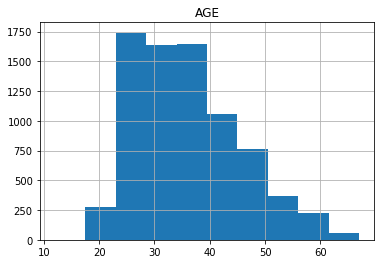

In [649]:
# histograms
df1.hist('AGE')
plt.show()

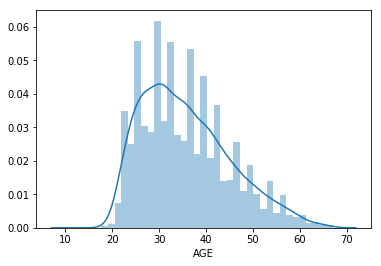

In [650]:
# density plot
sns.distplot(df1['AGE'])

In [723]:
df = df.rename(columns = {'APPLICATION.STATUS':'APPLICATION','MARITAL.STATUS':'MA','GENDER':'GE','EDUCATION':'ED','RESIDENCE.TYPE':'RE','EMPLOY.CONSTITUTION':'EM','APPLICATION.SCORE':'AS','APPROVED.AMOUNT':'AA','APPLIED.AMOUNT':'APA','LOAN.TENOR':'LO','OWN.HOUSE.TYPE':'OW','CURRENT.STAGE':'CU'})

In [724]:
Y, X = dmatrices('APPLICATION ~ MA + GE + ED + RE + EM + AS + AA + APA + LO + OW + CU', df, return_type="dataframe")

In [725]:
X.shape

(7759, 40)

In [726]:
Y = Y.rename(columns = {'APPLICATION[Approved]':'APPL'})

In [727]:
from sklearn.model_selection import train_test_split

In [728]:
Y

,APPL,APPLICATION[Declined]
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,0.0,1.0


In [729]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y['APPL'],test_size = 0.2,random_state = 0)

In [730]:
Y_train

4030    1.0
3493    1.0
2124    1.0
1290    1.0
5084    1.0
735     0.0
3167    0.0
4320    0.0
5943    1.0
3266    0.0
5747    1.0
7543    1.0
3018    1.0
3296    0.0
7727    0.0
1361    1.0
6073    1.0
187     0.0
6444    0.0
6788    0.0
196     0.0
3840    0.0
322     0.0
3669    0.0
2939    1.0
4017    0.0
2081    1.0
5190    1.0
3598    0.0
3050    1.0
       ... 
6036    1.0
6921    1.0
6216    1.0
2893    0.0
537     1.0
1701    1.0
2897    1.0
2222    1.0
2135    0.0
2599    0.0
7654    0.0
705     1.0
6458    1.0
3468    0.0
6744    1.0
7640    0.0
7238    0.0
6743    1.0
5924    0.0
5874    1.0
4373    0.0
1033    1.0
7527    0.0
5827    0.0
4859    1.0
4931    1.0
3264    1.0
1653    1.0
2607    0.0
2732    1.0
Name: APPL, Length: 6207, dtype: float64

In [731]:
from sklearn.naive_bayes import GaussianNB

In [732]:
# instantiate model

In [733]:
model  = GaussianNB()

In [734]:
# fit model

In [735]:
model.fit(X_train,Y_train)

GaussianNB(priors=None)

In [736]:
# model score

In [737]:
model.score(X_train,Y_train)

0.8490414048654744

In [738]:
# predict target

In [739]:
Y_pred = model.predict(X_test)

In [740]:
# confusion matrix

In [741]:
cm = confusion_matrix(Y_test, Y_pred)

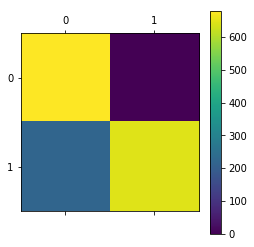

In [742]:
plt.matshow(cm)
plt.colorbar()

In [743]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print (metrics.classification_report(Y_test, Y_pred))

[[681   0]
 [223 648]]
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86       681
        1.0       1.00      0.74      0.85       871

avg / total       0.89      0.86      0.86      1552



In [744]:
model.class_prior_

array([0.42548735, 0.57451265])